### Hands on

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import sys

### Loading data

*head ./some-data/sales_data.csv*

In [2]:
sales = pd.read_csv("some-data/sales_data.csv", parse_dates=["Date"])

In [3]:
sales.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [4]:
sales.shape

(113036, 18)

In [5]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Date              113036 non-null  datetime64[ns]
 1   Day               113036 non-null  int64         
 2   Month             113036 non-null  object        
 3   Year              113036 non-null  int64         
 4   Customer_Age      113036 non-null  int64         
 5   Age_Group         113036 non-null  object        
 6   Customer_Gender   113036 non-null  object        
 7   Country           113036 non-null  object        
 8   State             113036 non-null  object        
 9   Product_Category  113036 non-null  object        
 10  Sub_Category      113036 non-null  object        
 11  Product           113036 non-null  object        
 12  Order_Quantity    113036 non-null  int64         
 13  Unit_Cost         113036 non-null  int64         
 14  Unit

In [6]:
sales.describe()

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
count,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000
mean,15.665753,2014.401739,35.919212,11.901660,267.296366,452.938427,285.051665,469.318695,754.370360
std,8.781567,1.272510,11.021936,9.561857,549.835483,922.071219,453.887443,884.866118,1309.094674
min,1.000000,2011.000000,17.000000,1.000000,1.000000,2.000000,-30.000000,1.000000,2.000000
25%,8.000000,2013.000000,28.000000,2.000000,2.000000,5.000000,29.000000,28.000000,63.000000
50%,16.000000,2014.000000,35.000000,10.000000,9.000000,24.000000,101.000000,108.000000,223.000000
75%,23.000000,2016.000000,43.000000,20.000000,42.000000,70.000000,358.000000,432.000000,800.000000
max,31.000000,2016.000000,87.000000,32.000000,2171.000000,3578.000000,15096.000000,42978.000000,58074.000000


In [7]:
sales["Unit_Cost"].describe()

count    113036.000000
mean        267.296366
std         549.835483
min           1.000000
25%           2.000000
50%           9.000000
75%          42.000000
max        2171.000000
Name: Unit_Cost, dtype: float64

In [8]:
sales["Unit_Cost"].mean()

267.296365759581

In [9]:
sales["Unit_Cost"].median()

9.0

<AxesSubplot:>

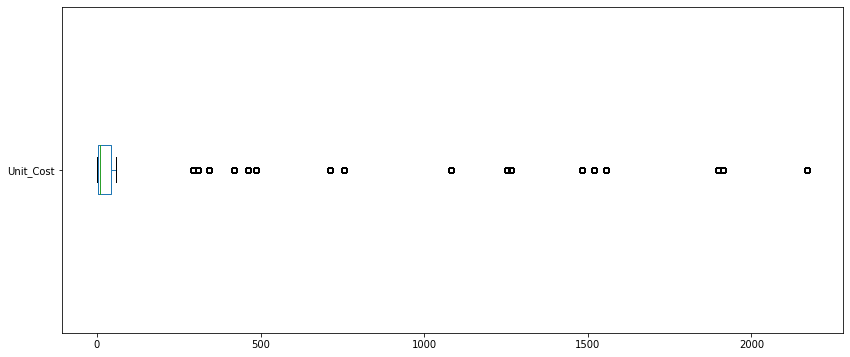

In [10]:
sales["Unit_Cost"].plot(kind="box", vert=False, figsize=(14,6))

<AxesSubplot:ylabel='Density'>

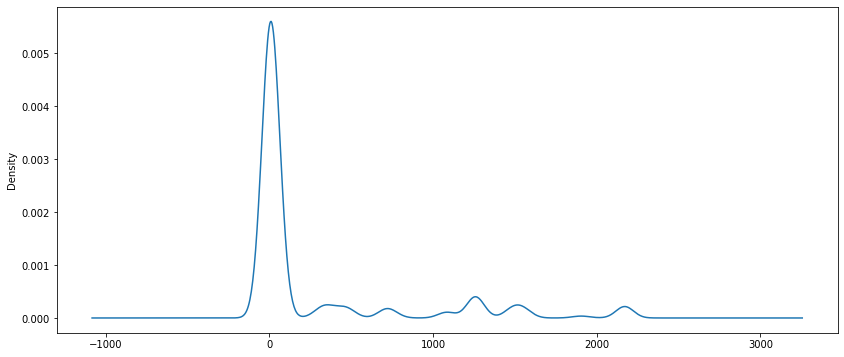

In [11]:
sales["Unit_Cost"].plot(kind="density", figsize=(14,6))

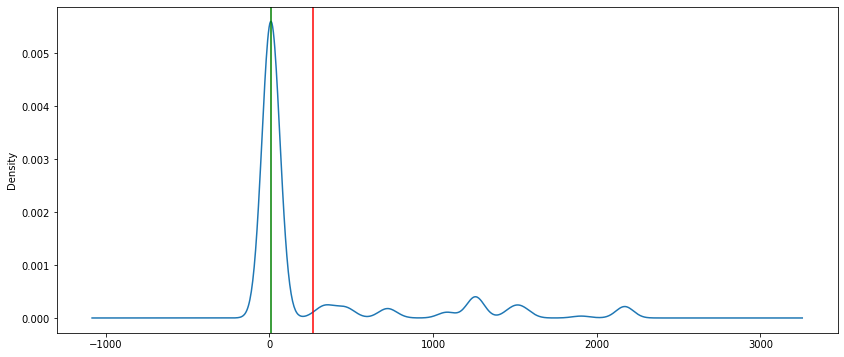

In [12]:
ax = sales["Unit_Cost"].plot(kind="density", figsize=(14,6))
ax = plt.axvline(sales["Unit_Cost"].mean(), color="red")
ax = plt.axvline(sales["Unit_Cost"].median(), color="green")

Text(0.5, 0, 'Dollars')

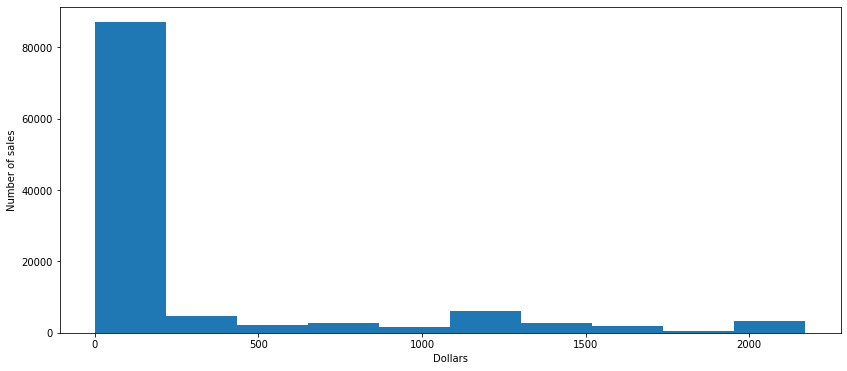

In [13]:
ax = sales["Unit_Cost"].plot(kind="hist", figsize=(14,6))
ax.set_ylabel("Number of sales")
ax.set_xlabel("Dollars")

In [14]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd

In [15]:
dataset_path = keras.utils.get_file("auto-mpg.data", "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
dataset_path

'/home/aggreyah/.keras/datasets/auto-mpg.data'

In [16]:
column_names = ["MPG", "Cylinders", "Displacement", "Horsepower", "Weight", "Acceleration", "Model Year", "Origin"]
raw_dataset = pd.read_csv(dataset_path, names=column_names, na_values="?", comment="\t", sep=" ", skipinitialspace=True)
dataset = raw_dataset.copy()
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [17]:
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [18]:
dataset.shape


(398, 8)

In [19]:
dataset = dataset.dropna()

In [20]:
dataset.shape

(392, 8)

In [21]:
a = np.array(([1,2,3,4,5], [5,6,7,8,9]))
a.shape

(2, 5)

In [22]:
a.dtype

dtype('int64')

In [23]:
b = np.array(["a", "b", "c"])
b.dtype

dtype('<U1')

In [24]:
c = np.array([
       [[1, 2, 3]],
       [[5, 6, 7]],
       [[8, 9, 10]]
    ])
c.shape

(3, 1, 3)

In [25]:
a = np.arange(4)
a += 10
a

array([10, 11, 12, 13])

In [26]:
a.shape

(4,)

In [27]:
a[[0, -1]]

array([10, 13])

In [28]:
a[0], a[-1]

(10, 13)

In [29]:
a[[True, False, False, True]]

array([10, 13])

In [30]:
a[a > 10]

array([11, 12, 13])

In [31]:
a.mean()

11.5

In [32]:
A = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
])

In [33]:
B = np.array([
    [6, 5],
    [4, 3],
    [2, 1]
])

In [34]:
A.dot(B)

array([[20, 14],
       [56, 41],
       [92, 68]])

In [35]:
A @ B

array([[20, 14],
       [56, 41],
       [92, 68]])

In [36]:
B.T

array([[6, 4, 2],
       [5, 3, 1]])

In [37]:
B.T @ A

array([[36, 48, 60],
       [24, 33, 42]])

In [38]:
sys.getsizeof(1)

28

In [39]:
sys.getsizeof(10**100)

72

In [40]:
np.dtype(int).itemsize

8

In [41]:
np.dtype(np.int64).itemsize

8

In [42]:
sys.getsizeof([1])

64

In [43]:
np.array([1]).nbytes

8

In [44]:
l = list(range(100000))

In [45]:
a = np.arange(100000)

In [46]:
%time np.sum(a ** 2)

CPU times: user 577 µs, sys: 164 µs, total: 741 µs
Wall time: 329 µs


333328333350000

In [47]:
%time sum([x ** 2 for x in l])

CPU times: user 28 ms, sys: 0 ns, total: 28 ms
Wall time: 27.6 ms


333328333350000

In [48]:
g7_pop = pd.Series([35.467, 63.951, 80.940, 68.665, 127.061, 64.511, 318.523])

In [49]:
g7_pop.name = "G7 Population in Millions."

In [50]:
g7_pop.values

array([ 35.467,  63.951,  80.94 ,  68.665, 127.061,  64.511, 318.523])

In [51]:
g7_pop.index = [
    "Canada",
    "France",
    "Germany",
    "Italy",
    "Japan",
    "United Kingdom",
    "United States"
]

In [52]:
g7_pop

Canada             35.467
France             63.951
Germany            80.940
Italy              68.665
Japan             127.061
United Kingdom     64.511
United States     318.523
Name: G7 Population in Millions., dtype: float64

In [53]:
g7_pop['United States']

318.523

In [54]:
g7_pop.iloc[6]

318.523

In [55]:
g7_pop['Canada':'Italy']

Canada     35.467
France     63.951
Germany    80.940
Italy      68.665
Name: G7 Population in Millions., dtype: float64

In [56]:
g7_pop > 70

Canada            False
France            False
Germany            True
Italy             False
Japan              True
United Kingdom    False
United States      True
Name: G7 Population in Millions., dtype: bool

In [57]:
g7_pop[g7_pop > 70]

Germany           80.940
Japan            127.061
United States    318.523
Name: G7 Population in Millions., dtype: float64

In [58]:
df = pd.DataFrame({
    "Population": [35.467, 63.951, 88.94, 68.665, 127.861, 64.511, 318.523],
    "GDP" : [
        1785387,
        2833687,
        3874437,
        2167744,
        4606327,
        2950039,
        17348075
    ],
    "Surface Area":[
        9984670,
        640679,
        357114,
        301336,
        377930,
        242495,
        9525067
    ],
    "HDI":[
        0.913,
        0.888,
        0.916,
        0.873,
        0.891,
        0.907,
        0.915
    ],
    "Continent":[
        "America",
        "Europe",
        "Europe",
        "Europe",
        "Asia",
        "Europe",
        "America"
    ]
}, columns=["Population", "GDP", "Surface Area", "HDI", "Continent"])

In [59]:
df.index = ["Canada", "France", "Germany", "Italy", "Japan", "United Kingdom", "United States"]

In [60]:
df["Population"]

Canada             35.467
France             63.951
Germany            88.940
Italy              68.665
Japan             127.861
United Kingdom     64.511
United States     318.523
Name: Population, dtype: float64

In [61]:
df.loc["Canada":"Japan", ["Continent", "HDI"]]

,Continent,HDI
Canada,America,0.913
France,Europe,0.888
Germany,Europe,0.916
Italy,Europe,0.873
Japan,Asia,0.891


In [62]:
df.loc[df["Population"] >= 70, ["Population", "HDI"]]

,Population,HDI
Germany,88.940,0.916
Japan,127.861,0.891
United States,318.523,0.915


In [63]:
ser = pd.Series([7, 8, 9, 45, 23,45, 10], index=list(df.index))
ser

Canada             7
France             8
Germany            9
Italy             45
Japan             23
United Kingdom    45
United States     10
dtype: int64

In [64]:
df["Crazy"] = ser
print(df)

                Population       GDP  Surface Area    HDI Continent  Crazy
Canada              35.467   1785387       9984670  0.913   America      7
France              63.951   2833687        640679  0.888    Europe      8
Germany             88.940   3874437        357114  0.916    Europe      9
Italy               68.665   2167744        301336  0.873    Europe     45
Japan              127.861   4606327        377930  0.891      Asia     23
United Kingdom      64.511   2950039        242495  0.907    Europe     45
United States      318.523  17348075       9525067  0.915   America     10


In [65]:
df["GDP Per Capita"] = df["GDP"] / df["Population"]

In [66]:
df

,Population,GDP,Surface Area,HDI,Continent,Crazy,GDP Per Capita
Canada,35.467,1785387,9984670,0.913,America,7,50339.385908
France,63.951,2833687,640679,0.888,Europe,8,44310.284437
Germany,88.940,3874437,357114,0.916,Europe,9,43562.367888
Italy,68.665,2167744,301336,0.873,Europe,45,31569.853637
Japan,127.861,4606327,377930,0.891,Asia,23,36026.051728
United Kingdom,64.511,2950039,242495,0.907,Europe,45,45729.239975
United States,318.523,17348075,9525067,0.915,America,10,54464.120330


In [67]:
s = pd.Series([1, 2, 3, np.nan, np.nan, 4])

In [68]:
pd.notnull(s).sum()

4

In [69]:
s[pd.notnull(s)]

0    1.0
1    2.0
2    3.0
5    4.0
dtype: float64

Object Oriented Matplotlib Interface

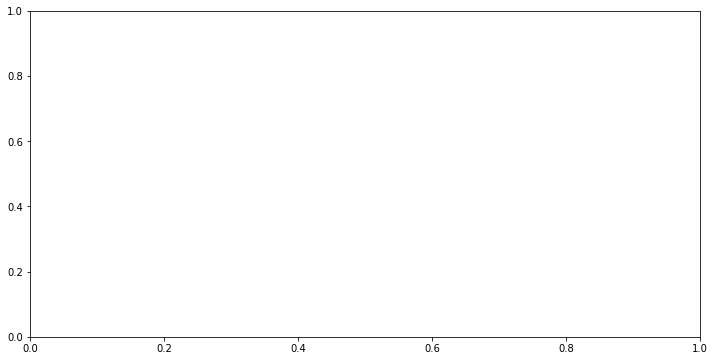

In [70]:
x = np.arange(-10, 11)
fig, axes = plt.subplots(figsize= (12, 6))

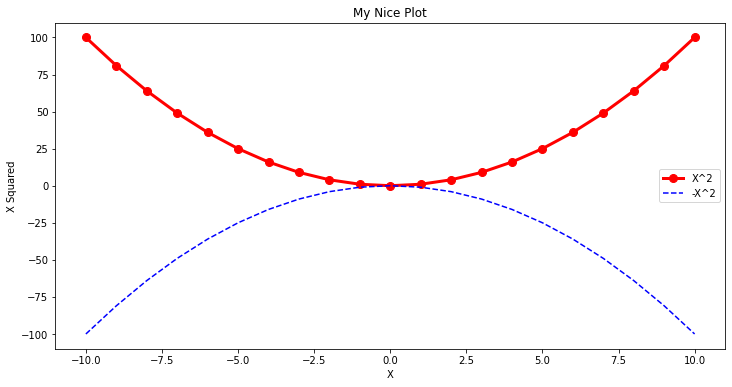

In [71]:
axes.plot(
    x, x**2, color='red', linewidth=3,
    marker='o', markersize=8, label='X^2'
)
axes.plot(x, -1*(x**2), 'b--', label='-X^2')
axes.set_xlabel('X')
axes.set_ylabel('X Squared')
axes.set_title('My Nice Plot')
axes.legend()
fig

In [72]:
import sqlite3

In [ ]:
conn = sqlite3.connect('./some-data/sakila.db')

In [80]:
cur = conn.cursor()

In [81]:
cur.execute('SELECT * FROM country LIMIT 5;')

In [82]:
results = cur.fetchall()

In [83]:
results

[(1, 'Afghanistan', '2019-04-11 18:11:48'),
 (2, 'Algeria', '2019-04-11 18:11:48'),
 (3, 'American Samoa', '2019-04-11 18:11:48'),
 (4, 'Angola', '2019-04-11 18:11:48'),
 (5, 'Anguilla', '2019-04-11 18:11:48')]

In [84]:
df = pd.DataFrame(results)

In [ ]:
df

In [86]:
cur.close()
conn.close()

In [88]:
df1 = pd.read_sql('SELECT * FROM country LIMIT 5;', conn)

In [89]:
df1

,country_id,country,last_update
0,1,Afghanistan,2019-04-11 18:11:48
1,2,Algeria,2019-04-11 18:11:48
2,3,American Samoa,2019-04-11 18:11:48
3,4,Angola,2019-04-11 18:11:48
4,5,Anguilla,2019-04-11 18:11:48


In [91]:
import requests
html_url = "https://en.wikipedia.org/wiki/The_Simpsons"

In [92]:
r = requests.get(html_url)
wiki_tables = pd.read_html(r.text, header=0)

In [93]:
len(wiki_tables)

27

In [94]:
simpsons = wiki_tables[1]

In [95]:
simpsons.head()

,Season,Season.1,No. ofepisodes,Originally aired,Originally aired.1,Originally aired.2,Viewership,Viewership.1,Viewership.2
0,Season,Season,No. ofepisodes,Season premiere,Season finale,Time Slot (ET),Avg. viewers(in millions),Most watched episode,Most watched episode
1,Season,Season,No. ofepisodes,Season premiere,Season finale,Time Slot (ET),Avg. viewers(in millions),Viewers(millions),Episode Title
2,1,1989–90,13,"December 17, 1989","May 13, 1990",Sunday 8:30 pm,27.8,33.5,"""Life on the Fast Lane"""
3,2,1990–91,22,"October 11, 1990","July 11, 1991",Thursday 8:00 pm,24.4,33.6,"""Bart Gets an F"""
4,3,1991–92,24,"September 19, 1991","August 27, 1992",Thursday 8:00 pm,21.8,25.5,"""Colonel Homer"""
